In [8]:
from ipywidgets import interact
import fabio
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np

# import cv2
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [9]:
d = '/users/opid01/edo/inhouse_jan_17/detector/align/'

In [14]:
scan8 = [fabio.open(d+'data_mpx4_04291.edf.gz')]
for n in range(34):
    scan8.append(scan8[n].next())

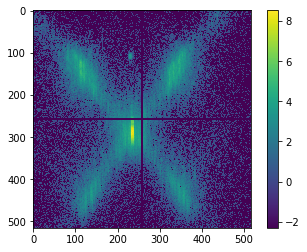

In [15]:
@interact(i=(0,len(scan8)))
def plt_scans(i):
    img = scan8[i].data#[0:256,0:256]
    img=img.astype('float')
    img[img==0.] = 0.1
    plt.imshow(np.log(img))
    plt.colorbar()

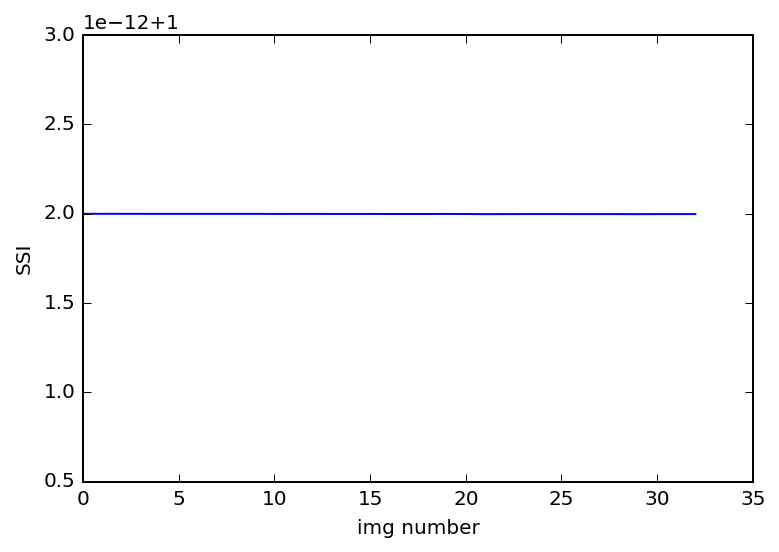

In [67]:
ssi = []
for n in range(1,34):
    s = ssim(scan8[0].data[0:256,0:256], scan8[n].data[0:256,0:256])
    ssi.append(s)

plt.plot(ssi)
# plt.yscale('log')
plt.ylabel('SSI')
plt.xlabel('img number');

In [36]:
scan8[0].data.sum().sum()

1425443

In [63]:
ls = []
for index in range(1,34):
    im = scan8[0].data * scan8[index].data
    im = im.sum().sum()
    ls.append(im)
ls = np.array(ls)

In [65]:
norm = ls.astype('float')/((scan8[0].data**2).sum().sum())

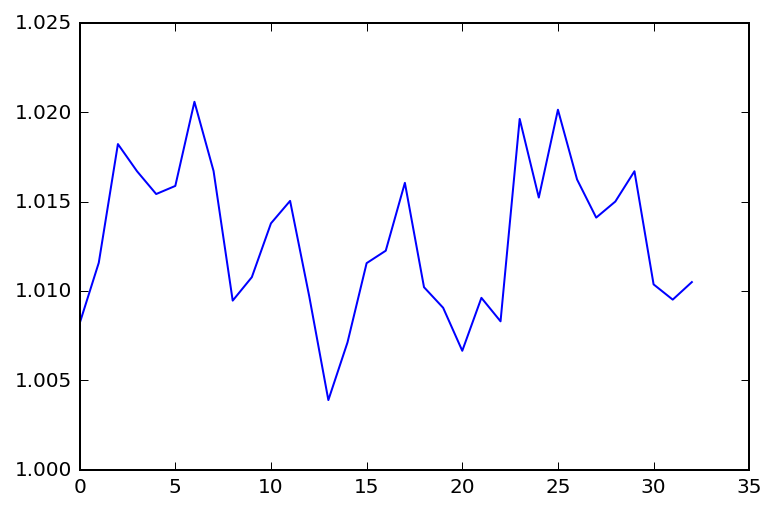

In [66]:
plt.plot(norm)